In [4]:
# Import necessary modules
import pandas as pd
import requests
import numpy as np

### Here we send a request to MLB's API for all players in today's games:

In [5]:
url = 'http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1'
r = requests.get(url=url).json()
dates = r['dates'][0]['games']
df = pd.DataFrame(dates)

In [6]:
HOST = 'https://statsapi.mlb.com'
url = HOST + df.loc[0,'link']
r = requests.get(url=url).json()
player_df = pd.DataFrame(r['gameData']['players'])
player_df.T

,id,fullName,link,firstName,lastName,primaryNumber,birthDate,currentAge,birthCity,birthStateProvince,...,lastFirstName,lastInitName,initLastName,fullFMLName,fullLFMName,strikeZoneTop,strikeZoneBottom,nameMatrilineal,nameTitle,nameSuffix
ID518617,518617,Jake Diekman,/api/v1/people/518617,Jacob,Diekman,30,1987-01-21,37,Wymore,NE,...,"Diekman, Jake","Diekman, J",J Diekman,Jacob Tanner Diekman,"Diekman, Jacob Tanner",3.549,1.627,NaN,NaN,NaN
ID694973,694973,Paul Skenes,/api/v1/people/694973,Paul,Skenes,30,2002-05-29,22,Fullerton,CA,...,"Skenes, Paul","Skenes, P",P Skenes,Paul David Skenes,"Skenes, Paul David",3.656,1.677,NaN,NaN,NaN
ID518735,518735,Yasmani Grandal,/api/v1/people/518735,Yasmani,Grandal,6,1988-11-08,35,Havana,NaN,...,"Grandal, Yasmani","Grandal, Y",Y Grandal,Yasmani Grandal,"Grandal, Yasmani",3.22,1.51,NaN,NaN,NaN
ID621438,621438,Tyrone Taylor,/api/v1/people/621438,Tyrone,Taylor,15,1994-01-22,30,Torrance,CA,...,"Taylor, Tyrone","Taylor, T",T Taylor,Tyrone Anthony Taylor,"Taylor, Tyrone Anthony",3.46,1.57,NaN,NaN,NaN
ID668804,668804,Bryan Reynolds,/api/v1/people/668804,Bryan,Reynolds,10,1995-01-27,29,Baltimore,MD,...,"Reynolds, Bryan","Reynolds, B",B Reynolds,Bryan Patrick Reynolds,"Reynolds, Bryan Patrick",3.14,1.52,NaN,NaN,NaN
ID682626,682626,Francisco Alvarez,/api/v1/people/682626,Francisco,Alvarez,4,2001-11-19,22,Guatire,NaN,...,"Alvarez, Francisco","Alvarez, F",F Alvarez,Francisco Javier Alvarez,"Alvarez, Francisco Javier",3.41,1.56,Pulido,NaN,NaN
ID642133,642133,Rowdy Tellez,/api/v1/people/642133,Ryan,Tellez,44,1995-03-16,29,Sacramento,CA,...,"Tellez, Rowdy","Tellez, R",R Tellez,Ryan John Tellez,"Tellez, Ryan John",3.68,1.71,NaN,NaN,NaN
ID656582,656582,Connor Joe,/api/v1/people/656582,Connor,Joe,2,1992-08-16,31,San Diego,CA,...,"Joe, Connor","Joe, C",C Joe,Connor Kok-Wy Joe,"Joe, Connor Kok-Wy",3.24,1.54,NaN,NaN,NaN
ID500779,500779,Jose Quintana,/api/v1/people/500779,Jose,Quintana,62,1989-01-24,35,Arjona,NaN,...,"Quintana, Jose","Quintana, J",J Quintana,Jose Guillermo Quintana,"Quintana, Jose Guillermo",3.411,1.565,NaN,NaN,NaN
ID676596,676596,Josh Fleming,/api/v1/people/676596,Josh,Fleming,28,1996-05-18,28,Bridgeton,MO,...,"Fleming, Josh","Fleming, J",J Fleming,Josh R. Fleming,"Fleming, Josh R.",3.467,1.589,NaN,NaN,NaN


In [16]:
#player_df = player_df.T
foreign_players = player_df['birthCountry'] != 'USA'
foreigners = player_df.loc[foreign_players]
americans = player_df.loc[foreign_players == False]

<Axes: xlabel='Age', ylabel='Draft Year'>

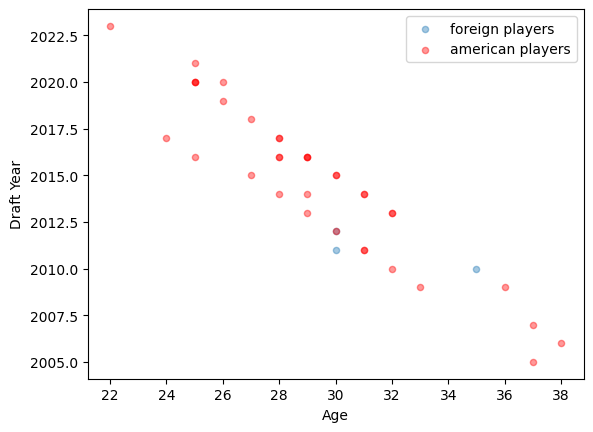

In [25]:
ax = foreigners.plot.scatter(x='currentAge', y='draftYear', alpha = 0.4, label= 'foreign players')
ax = americans.plot.scatter(x='currentAge', y='draftYear', alpha = 0.4, color= 'red', label= 'american players', ax=ax)
ax.set_ylabel('Draft Year')
ax.set_xlabel('Age')
ax